# Abstention Rate and New Information Technologies in Spain

### *Analysing the relation between voter turnout in Spain’s presidential elections and the barrage of the New Information Technologies with Python*

There is no doubt, the rise and normalization of internet use has proved to become a second Golden Age for the information.

By keystroking, either tactile or physical, we have access to a wide variety of media and social networks that allows us to be witnesses of real-time events around the world. It is clear that, nowadays, knowledge sources are broader and more extended than 30 years ago, so it can be reasonably assumed that the average citizen is more informed, but: Could we assume that he is better informed as well?

In fact, both in statistical and journalistic terms, an overload of information has always tended to become what we know as “noise”. That’s why in this digital era we can find a little rise of the flat earth theories, more people reluctant to vaccines and, furthermore, we have been witnesses of how the social networks have resulted into a curious instrument of mobilization and politic polarization around the world.

Therefore, in this internet overexposure outlook, it is appropriate to wonder how much extended is the influence of new technologies in the voter turnout. Are today’s citizens more or less apathetic regarding the democratic process? Does the access to multiple information sources involve an incentive effect when deciding to vote or not?

In order to find a potential answer to these questions we are going to practice with Python, formatting and parsing some data tables from the INE (National Statistic Institute) , and we will also extract and analyse data by using the report “Marco General para los Medios” from the AIMC (Association for Media’s Research). If you’re not familiar with Python’s language, don’t panic, we will try to make simple and explained exercises which will allow you to easily locate yourself at every moment.
Regarding the target of this analysis, we’ll mainly try to determinate if there is some kind of relation between the abstention rate and the amount of use and trust level in the new technologies as media.

With this article we hope to provide the basis and open a gate for future data analysts that may use the principles of this survey to determinate what could influence the voter turnout in a country like Spain.
We’ll divide the survey in 3 articles. In this one, we are going to analyse the voter turnout in Spain from 1979 to 2019, formatting a CSV file into a data frame and analysing and visualizing the given data. In the second one we are going to extract data from multiple sources and analyse the use and implementation of the new technologies in the country. Lastly, in the third one, we’re going to deploy some statistical models to analyse the correlation between the two variables and expose the conclusions.

Let’s start!

## Part I. Analysing the evolution of voter turnout in Spain’s presidential elections with Python:

In [1]:
# We will use the following modules :

import pandas as pd # We will use Pandas to operate with the dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

import numpy as np # We will import Numpys in case of having to do some mathematical operations.

import matplotlib.pyplot as plt # We will use Matplotlib and Seaborn to generate the different visualisation methods.
import matplotlib as mpl

import seaborn as sns 

from sklearn.preprocessing import StandardScaler,PolynomialFeatures # In order to make the statistical analysis.
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Working with the data:

The first step is to load the data we are going to work with. You can download the CSV file from: https://www.epdata.es/evolucion-abstencion-elecciones-generales-celebradas-espana/8732cccd-0519-4f0b-9d47-c0d2231ed29b.
After having downloaded it, we did a little formating in Excel, such as changing the language and deleting some text lines, then imported it to Python via pandas read_csv:

In [2]:
# La tasa de Abstencionismo en España

Absten = pd.read_csv('C:/Users/Fran/Downloads/evolucion_de_la_abstencio.csv')

Absten

,Year;Period;Voters Turnout
1979;March;31,96.0
1982;October;20,3.0
1986;June;29,7.0
1989;October;30,7.0
1993;June;23,6.0
1996;March;21,92.0
2000;March;30,NaN
2004;March;22,74.0
2008;March;24,65.0
2011;November;28,29.0


As we can see, we ran the command without specifying the preferences for the CSV reading, so we have this messy format. Let’s establish some conditions:

In [3]:
Absten = pd.read_csv('C:/Users/Fran/Downloads/evolucion_de_la_abstencio.csv', header = 0, delimiter= ';', index_col=None)

Absten

,Year,Period,Voters Turnout
0,1979,March,"31,96"
1,1982,October,"20,03"
2,1986,June,"29,07"
3,1989,October,"30,07"
4,1993,June,"23,06"
5,1996,March,"21,92"
6,2000,March,30
7,2004,March,"22,74"
8,2008,March,"24,65"
9,2011,November,"28,29"


The voters turnout is the total of the participation, so we will also change the column’s name for “Abstention” in order to make it more comprehensive:

In [4]:
column_names = Absten.columns.values
column_names[2] = "Abstention"
Absten.columns = column_names
Absten

,Year,Period,Abstention
0,1979,March,"31,96"
1,1982,October,"20,03"
2,1986,June,"29,07"
3,1989,October,"30,07"
4,1993,June,"23,06"
5,1996,March,"21,92"
6,2000,March,30
7,2004,March,"22,74"
8,2008,March,"24,65"
9,2011,November,"28,29"


Comprobemos la coherencia de los datos:

In [5]:
Absten.dtypes

Year           int64
Period        object
Abstention    object
dtype: object

As we can see, we have a column with float numbers which is “object” type, let’s fix that:

In [6]:
# First we replace the coma for a point, as float don't recognize the coma as decimal separation. Then we convert it to float:

Absten['Abstention'] = [float(x.replace(',','.')) for x in Absten['Abstention']]

Absten

,Year,Period,Abstention
0,1979,March,31.96
1,1982,October,20.03
2,1986,June,29.07
3,1989,October,30.07
4,1993,June,23.06
5,1996,March,21.92
6,2000,March,30.00
7,2004,March,22.74
8,2008,March,24.65
9,2011,November,28.29


Let’s check the correction:

In [7]:
Absten.dtypes

Year            int64
Period         object
Abstention    float64
dtype: object

Finally, we are going to work with the year and the abstention rate, so we can drop the “Period” column:

In [8]:
AbstenYearRate = Absten.drop(Absten.columns[[1]], axis='columns')

AbstenYearRate

,Year,Abstention
0,1979,31.96
1,1982,20.03
2,1986,29.07
3,1989,30.07
4,1993,23.06
5,1996,21.92
6,2000,30.00
7,2004,22.74
8,2008,24.65
9,2011,28.29


Once we have processed and cleaned the frame, we can find, for example, the mean abstention rate over the last 40 years, the standard deviation for this variable or the years in which there is more or less voters turnout:

In [9]:
# Statistical Values for the abstention from 1979 to 2019:

AbstenYearRate['Abstention'].describe()

count    13.000000
mean     26.385385
std       3.822054
min      20.030000
25%      23.060000
50%      26.800000
75%      30.000000
max      31.960000
Name: Abstention, dtype: float64

In [10]:
# Let's order the years by abstention rate:

AbstenYearRate.groupby(['Abstention'], sort=True)['Year'].max()

Abstention
20.03    1982
21.92    1996
22.74    2004
23.06    1993
24.25    2019
24.65    2008
26.80    2015
28.29    2011
29.07    1986
30.00    2000
30.07    1989
30.17    2016
31.96    1979
Name: Year, dtype: int64

We have obtained that the mean abstention rate for this 40 years has been 26,39% of the census, with a standard deviation of the 3% for the observed period.

Concerning the maximum values, we find the highest rate in 1979 (32%), 2016 (30,2%), 1989 (30,1%) and 2000 (30%). In the minimum values we find that the lowest abstention rate was in the 1982 elections with a 20% of abstention, followed by 1996 (22%), 2004 (22,7%) and 1993 (23,1%).

Now let’s plot the frame into a line graph in order to better understand the results. In addittion, we will try to identify some potential pattern or tendence:

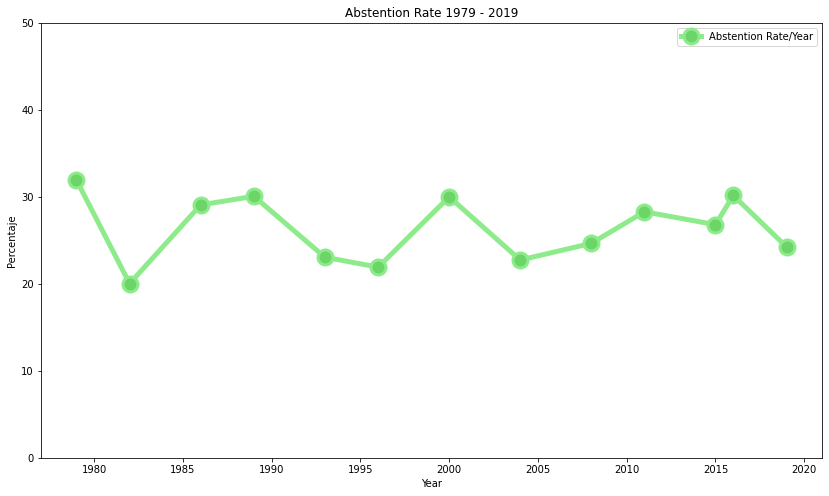

In [11]:
graf1 = AbstenYearRate.plot(x = 'Year', y = 'Abstention', kind='line', figsize=(14, 8), color='#8EEB8B', linewidth = '5', marker ='o',
                       mew = 3, mfc='#6BD567', ms = 15, label= "Abstention Rate/Year")


plt.ylim([0,50])

plt.title('Abstention Rate 1979 - 2019')
plt.ylabel('Percentaje')
plt.xlabel('Year')

plt.show()

A priori, we can see that there is a slight cyclical behaviour, if there has been a high abstention rate, it will decrease in the following elections and viceversa. However, we can notice how in the 1989 elections the abstention rised despite it has increased in the previous voting. The same happens for the 1996 elections, where the abstention rate was lower than the above elections although it was already declining.

From the 21th century, we can tell that the 2000 and 2016 elections had a high abstention rate, in fact, as we see, the abstention rate follows an increasing tendance from 2007 to 2019, where it drops to 24%, 2 points under the mean.

In the following part of the article we will analyse the use of new technologies in Spain, and in the final part we will set the conclutions of this report and the possibility of a relation between the two variables, nonetheless, as a previous reflexion, we could suggest that the abstention rate has an increasing tendance from 2007, year in which the using of new tecnologies and internet in most of the spanish homes started to be normal.



## Part II. Analyzing the evolution of the ICTs in Spain:

In the previous part of this article, we have analysed the voters turnout in Spain. By using Python language, we calculated the mean Abstention Rate from 1979 to 2019 and we plotted the data frame in order to identify potential patterns and other behaviours in the graph, concluding that there's a slight cyclical behaviour and that for the last 6 elections (2007 - 2019) the mean Abstention Rate has increased.

Now we are going to make it a little more difficult: we will extract, format and parse data from multiple sources with the purpose of getting an insight of the situation and the evolution of Information and Comunication Technologies in Spain. We will work with data from the AIMC and the INE: 

From the AIMC we will download the PDF "Marco General de los Medios en España - 2021", where we can find an evolution of the frequency of use of new ICTs. As you may have guessed, we are going to extract tables from a PDF in order to analyse it:

   https://www.aimc.es/a1mc-c0nt3nt/uploads/2021/02/marco2021.pdf


From the INE we are going to work with different tables in order to complementate the AIMC's analysis:
   
   - Level of confidence in Internet in the last 3 months:  https://www.ine.es/jaxi/Datos.htm?tpx=39519#!tabs-tabla
     
   - Level of confidence in Internet in the last 12 months by socioeconomic features:  https://ine.es/jaxi/Datos.htm?path=/t25/p450/base_2011/a2019/l0/&file=04026.px
     
   - Evolution (2006-2020) by Autonomous Region, ICT type of use and period:  https://www.ine.es/jaxi/Datos.htm?tpx=39484
   
So we have the sources and we have the data... We can start!

First of all, with the object of understanding the evolution of the ICTs implementation in Spain we are going to convert the table called "EVOLUCIÓN DE LA AUDIENCIA GENERAL DE LOS MEDIOS - 1980-2020" from PDF's page 13 using the tabula method. As you can check, this table has an evolution of the audience penetration for each media from the mentioned period:

In [12]:
!java -version

openjdk version "1.8.0_292"
OpenJDK Runtime Environment (AdoptOpenJDK)(build 1.8.0_292-b10)
OpenJDK 64-Bit Server VM (AdoptOpenJDK)(build 25.292-b10, mixed mode)


In [13]:
!pip install -q tabula-py

You should consider upgrading via the 'c:\users\fran\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
import tabula

pdf_path = "https://www.aimc.es/a1mc-c0nt3nt/uploads/2021/02/marco2021.pdf"

aud_pen = tabula.read_pdf(pdf_path, pages="13", pandas_options={'header': None }, output_format="dataframe")

aud_pen

We have obtained a raw list which must be formated into a data frame in order to make it comprenhensive. We must rename the columns and replace the NaN values by a 0:

In [ ]:
# We format into a data frame 

ap_df = aud_pen[0]

ap_df.head()

In [ ]:
# Let's establish the column's name and set 'Year' as index and remove the (*) from 1980 and 1981 and:

print('Before change', ap_df.columns)

ap_df.columns = ['Year', 'Sample', 'Newspapers', 'Supplements', 'Magazines', 'Total Radio', 'Mainstream Radio', 'Thematic Radio', 'MW', 'FM', 'Internet Radio', 'DigTV Radio', 'TV', 'Cinema', 'Internet Last 30 days', 'Internet Last Day', 'Outdoor Advertising']

print('After change', ap_df.columns)

In [ ]:
ap_df.loc[0, 'Year'] = '1980'
ap_df.loc[1, 'Year'] = '1981'

In [ ]:
ap_df = ap_df.set_index('Year')

In [ ]:
# Let's replace the NaN values by 0:

ap_df = ap_df.fillna(0)

ap_df.head()

To make it more clear let's also erase some columns that we are not going to use:

In [ ]:
ap_df = ap_df.drop(['Sample', 'Mainstream Radio', 'Thematic Radio', 'MW', 'FM', 'Internet Radio', 'DigTV Radio', 'Cinema'], axis=1)

ap_df.head()

All right! That's a nice DataFrame!

Let's plot it in order to better understand the evolution of the penetration rate of each media in the reporting period. First let's check the data type:

In [ ]:
ap_df.dtypes

All the data types are 'object' type, let's fix that. 

As we saw in the last article, first we have to replace the comma for a point so that it will be recognizable for the astype function.

In [ ]:
ap_df = ap_df.apply(lambda x: x.str.replace(',','.'))

In [ ]:
ap_df = ap_df.astype(float)

In [ ]:
ap_df.dtypes

In [ ]:
ap_df = ap_df.fillna(0)

ap_df

Done! Let's make the graphic:

In [ ]:
ap_df.plot(kind='line', figsize=(20, 10), linewidth = '10', fontsize='15')

plt.title('Audience Penetration in Spain by Year and Media 1980 - 2020', fontsize=30)

plt.ylabel('Percentage', fontsize=25)
plt.xlabel('Years', fontsize =25)

plt.legend(bbox_to_anchor=(1.0, 0.42), fontsize='xx-large')
plt.xlim(0, 40.0)
axes1 = plt.axes()

axes1.spines['top'].set_visible(False)


plt.show()

Analysing the graph, we are witnesses of how the written press has indeed decreased in recent times. For newspapers, we can see how it declines from a value near 41% to its final value of 18% for the household broadband penetration from the last 15 years. The same behaviour is shown by the other written press variables. The consumption values for magazines and supplements have declined from 53% to 26% for the first one, and from 28% to 6% for the second one for the period between 2005 and 2020.

We can say that radio and TV have been the kings of mass media in the 20th century and, as we see in the line graph, its values have remained nearly stable from 1980 to 2020. Indeed for the last 15 years the TV consumption has only decreased a 3% (85% for 2020) and the radio has even increased from 2005 to 2012, year in which reaches its maximum value since 1982. After 2012 it decrases from 62% to 56% in 2020.

Regarding the object of this report, we can see how effectively the new ICTs have supposed a real "boom" in our households. From almost residual values at the end of the century, we can see how the consumption of internet has increased in a nearly exponential way. In the last 15 years, the households which used internet in the last 30 days increased from 34% in 2005 to 85% in 2020, and those who used internet in the last day raised from 20% in 2005 to 81% in 2020.

Finally, we can see how the value Outdoor Advertising, which corresponds with any advertising done outdoors that publicizes products and services, begins to be measured from the year 2006. Starting from 51% it has raised 29 percentage points in 15 years, settling in 80% for 2020.

Since the ICT concept includes the influence of the use of internet and new technologies in the comunication process, medias as written press can be eliminated from the analysis. For the radio, albeit nowadays it can be played online, we will consider it traditional media. By its adaptation to the digital technologies, we can consider the TV as ICT too, so let's see a detail view of this evolution by chosing the appropiate columns:

In [ ]:
# As we start to have information for the values in 1996 let's eliminate the previous years too:

ICT_df = ap_df.iloc[15:41]

ICT_df = ICT_df.loc[:,['TV','Internet Last 30 days','Internet Last Day','Outdoor Advertising']]

ICT_df

In [ ]:
# Let's choose some nice colours:

barcolours = ['#D4E6F1','#7FB3D5','#ABEBC6','#117864']

# Plotting:

ICT_df.plot(kind='bar',figsize=(22,10), width = 1.1, fontsize='15', color= barcolours)

plt.title('ICTs Household Penetration Rate in Spain 1995 - 2020', fontsize= 30)
plt.ylabel('%', fontsize=25)
plt.xlabel('Years', fontsize =25)

plt.legend(bbox_to_anchor=(1.0, 0.9), fontsize='xx-large')

axes = plt.axes()

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)



plt.show()

That's a nice way to represent the influence of the ICTs in our homes!

## Part III. Analyzing the correlation between the Abstention Rate and the barrage of the New Information Technologies and stating conclusions.

That’s it! We arrived at the last part of this analysis. If you have reached this point, let me congratulate you!

In the last two articles we have analysed the evolution of voters turnout in Spain and the influence of the ICTs in the spanish households. Now we are going to find out if there is a relation between the two variables using a statistical model as correlation is.

First of all, let's us recall the dataframes we are going to work with:

In [ ]:
# By one hand we are going to work with the abstention table:

AbstenYearRate


In [ ]:
print(AbstenYearRate.shape)

In [ ]:
# By the other hand, we have the ICTs Household Penetration Rate:

ICT_df.head(10)

In [ ]:
print(ICT_df.shape)

So, can you notice if there is any problem with these data tables?

Effectively, we still have some formatting problems. As you may understand, since the elections is an every four-years event, we have less data entries for the abstention table (one by election year) than the ICTs table. Furthermore, as the ICTs are something relatively new, we start to have data entries from 1995 onwards, while the abstention set starts in 1979…

Those differences between tables leads us to a typical data analysis problem that we will repeatedly find over our career: Which is the better method for a good accuracy?

Indeed, you can choose among plenty of paths to resolve this kind of problem. For example, you can make a cluster for every 4 years in the ICTs table with the mean values for each 4 years, you can calculate manually and load it in a new frame, etc. If you are lucky enough to work in a team, this kind of decision may normally be taken among all the project’s crew.

In this case, as I want to make an easy example, I’ve chosen the simplest way, which is to work with the respective years in each table.

In [ ]:
# Lets drop all the years that we aren't going to use

ICTAbs = ICT_df.drop(ICT_df.index[[0,2,3,4,6,7,8,10,11,12,14,15,17,18,19,22,23,25]]).reset_index()

ICTAbs

In [ ]:
# And fot the abstention set, let's eliminate all the previous years from 1996 and keep only the abstention rates

Abstent = AbstenYearRate.iloc[5:13].reset_index().drop(['index', 'Year'], axis=1)

Abstent

Good!

In [ ]:
# Lets concatenate the two frames

ICT_ABS = pd.concat([ICTAbs, Abstent], axis=1)

ICT_ABS

Let's focus our analysis on the internet and TV use by erasing the 'Outdoor Advertising' column 

In [ ]:
# Let's focus our analysis on the internet and TV use by erasing the 'Outdoor Advertising' column

ICT_ABS = ICT_ABS.drop(['Outdoor Advertising'], axis=1).set_index('Year')
ICT_ABS

Now we have a data set containing all the data ready to work with. We are going to analyse if there exists a correlation between each variable and the abstention rate:

In [ ]:
# Importing the modules:

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# Now let's plot the correlation map by using Matplotlib's Pyplot

plt.scatter(ICT_ABS.TV, ICT_ABS.Abstention,  color='red')
plt.xlabel("TV Household Penetration")
plt.ylabel("Abstention Rate")
plt.show()

# Let's calculate Pearson's Coefficient and the P-value.

corr_test = pearsonr(x = ICT_ABS["TV"], y =  ICT_ABS['Abstention'])
print("Pearson Correlation Coefficient", corr_test[0])
print("P-value: ", corr_test[1])

In [ ]:
plt.scatter(ICT_ABS['Internet Last 30 days'], ICT_ABS.Abstention,  color='blue')
plt.xlabel("Internet last 30 days Household Penetration")
plt.ylabel("Abstention Rate")
plt.show()

corr_test = pearsonr(x = ICT_ABS['Internet Last 30 days'], y =  ICT_ABS['Abstention'])

print("Pearson Correlation Coefficient", corr_test[0])
print("P-value: ", corr_test[1])

In [ ]:
plt.scatter(ICT_ABS['Internet Last Day'], ICT_ABS.Abstention,  color='green')
plt.xlabel("Internet last day Household Penetration")
plt.ylabel("Abstention Rate")
plt.show()

corr_test = pearsonr(x = ICT_ABS['Internet Last Day'], y =  ICT_ABS['Abstention'])

print("Pearson Correlation Coefficient", corr_test[0])
print("P-value: ", corr_test[1])

What conclusions have we obtained after this individual correlation analysis?

First of all, the small amount of data that we have, made the analysis less accurate. Although we could have a little approximation, the low correlation values and the high P-values in each of the performed models indicates that the probability of our hypothesis (the voter turnout rises with the higher exposition to the ICTs) to success has a low reliability level.
In other words, according to our statistical results, it is more likely that the correlation between our variables is a chance occurrence instead of a possible relation.

That said, and emphasizing again the high P-values for each of the correlations, we can see, nevertheless, how there exists a slightly negative correlation between the TV consumption and the abstention rate, i.e, as one variable increases the other one has a little decrease. On the other hand, we can appreciate how there is a slight positive correlation between the abstention rate and the internet consumption (for the last day consumption as well as for the last month consumption), both variables had a gentle trend to increase together.

May this be the top of the iceberg that will show us that, effectively, the increase of the ICTs exposure could lead in a rise of political apathy?

It would be, of course, excessively presumptuous to try to set a succinct conclusion with the analysed data. We should imagine this survey as a big puzzle to solve from scratch; first we start by adding pieces in order to make the remnants of images, and by putting them together, little by little, we make the whole set. For this purpose, it is ideal to ask ourselves the questions that entails such pieces. For example: Does the people trust in the internet? Where do they read up on the news? Has the political propaganda increased in the net? Which causes there are behind the maximum and minimum values?

Throughout the analysis of the relation among the answers to those questions, we would maybe be able to start building a consolidated image of what is behind the voter turnout and the new ICTs effect and, in the future, have a clear answer to our question.

And now, which way to go forward? First of all, I would propose to analyse the rest of electoral processes in the country. We have chosen only the presidential election processes, with the consequence of reducing our effective sample size and, by extension, draining its accuracy and reliability. Is for this reason that it would be convenient to repeat the process of this article, but by analysing the evolution of ICTs consumption and voter turnout for each of the regional elections in every autonomous community, so that the possibility of a correlation between both variables can be a little more accurate. Would you like to try this process with the data of your autonomous community?

This is how far we have come with our analysis between the abstention rate and the ICTs household consumption in Spain. I would like to thank you so much if you have followed all the process! In order to make it more understandable, I invite you to visit my GitHub and download this Notebook and my other projects: https://github.com/FHERREGON.

I hope you’ll enjoy the next articles too!

See you soon!
